Optimized Total Wire Length: 5.230549627939509


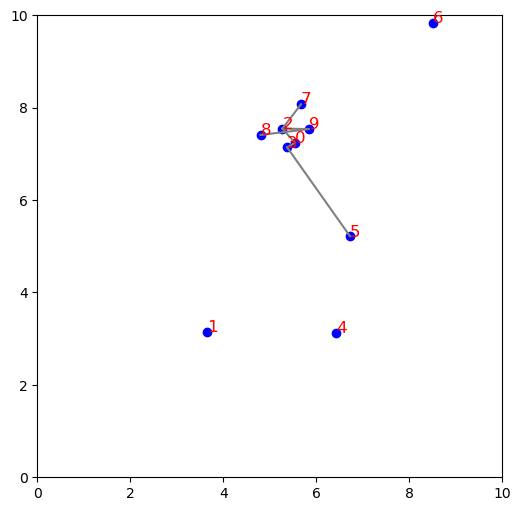

In [3]:
import random
import math
import matplotlib.pyplot as plt

# Parameters
n = 10  # Number of components
temperature = 1000  # Initial temperature
cooling_rate = 0.90  # Slower cooling rate for more thorough exploration
iterations = 200  # Increased iterations per temperature for more exhaustive search
num_runs = 10  # Number of times to run the algorithm

# Generate random components and connections
components = {i: (random.uniform(0, 10), random.uniform(0, 10)) for i in range(n)}
connections = {i: random.sample(range(n), k=random.randint(1, 3)) for i in range(n)}

def plot_layout(components, connections):
    plt.figure(figsize=(6, 6))
    for i, (x, y) in components.items():
        plt.scatter(x, y, color='blue')
        plt.text(x, y, f'{i}', color='red', fontsize=12)
        for j in connections[i]:
            if i < j:  # To avoid plotting the same line twice
                plt.plot([x, components[j][0]], [y, components[j][1]], 'gray')
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.show()

def total_wire_length(components, connections):
    length = 0
    for i, pos in components.items():
        for j in connections[i]:
            if i < j:  # To avoid double counting
                length += math.hypot(components[j][0] - pos[0], components[j][1] - pos[1])
    return length

def perturb(components):
    new_components = components.copy()
    idx = random.choice(list(new_components.keys()))
    new_components[idx] = (random.uniform(0, 10), random.uniform(0, 10))
    return new_components

# Simulated Annealing Function
def simulated_annealing(initial_layout, connections):
    current_layout = initial_layout
    current_cost = total_wire_length(current_layout, connections)
    best_layout = current_layout
    best_cost = current_cost
    temp = temperature

    while temp > 1:
        for _ in range(iterations):
            new_layout = perturb(current_layout)
            new_cost = total_wire_length(new_layout, connections)
            cost_diff = new_cost - current_cost
            if cost_diff < 0 or random.uniform(0, 1) < math.exp(-cost_diff / temp):
                current_layout = new_layout
                current_cost = new_cost
                if new_cost < best_cost:
                    best_layout = new_layout
                    best_cost = new_cost
        temp *= cooling_rate

    return best_layout, best_cost

# Multiple Runs
best_overall_layout = None
best_overall_cost = float('inf')

for _ in range(num_runs):
    layout, cost = simulated_annealing(components, connections)
    if cost < best_overall_cost:
        best_overall_layout = layout
        best_overall_cost = cost

# Results
print("Optimized Total Wire Length:", best_overall_cost)
plot_layout(best_overall_layout, connections)
